In [1]:
import torchvision.models as models
from torchvision.models import EfficientNet_B5_Weights
import torch
import torch.nn as nn
from torchvision import models
import pandas as pd

# Superclass CNNMLP

In [21]:
class SuperClassCNNMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim1=128, hidden_dim2=64, output_dim=4):
        super(SuperClassCNNMLP, self).__init__()
        
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),  
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2),  

            nn.Conv2d(16, 32, kernel_size=3, padding=1),  
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2), 

            nn.Conv2d(32, 64, kernel_size=3, padding=1), 
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2), 

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),  
        )

        self.classifier = nn.Sequential(
            nn.Linear(256 * 7 * 7, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, output_dim),
        )
    
    def forward(self, x):
        x = self.conv_layers(x)               
        x = x.view(x.size(0), -1)             
        x = self.classifier(x)    
        return x

In [22]:
super_class_train = pd.read_csv('train_data.csv')

In [23]:
super_class_train = super_class_train[['image', 'superclass_index']]

In [24]:
super_class_train['image'] = super_class_train['image'].apply(
    lambda x: x if x.startswith('./train_images/train_images/') else f'./train_images/train_images/{x}'
)

In [25]:
super_class_train

,image,superclass_index
0,./train_images/train_images/0.jpg,1
1,./train_images/train_images/1.jpg,0
2,./train_images/train_images/2.jpg,1
3,./train_images/train_images/3.jpg,1
4,./train_images/train_images/4.jpg,0
...,...,...
6283,./train_images/train_images/6283.jpg,2
6284,./train_images/train_images/6284.jpg,2
6285,./train_images/train_images/6285.jpg,0
6286,./train_images/train_images/6286.jpg,0


In [26]:
import os
root_dir = './train_images/fishes/'
img_paths = []
for root, dirs, files in os.walk(root_dir):
    for file in files:
        if file == '.DS_Store':
            continue
        full_path = os.path.join(root, file)
        img_paths.append(full_path.replace("\\", "/"))
new_data = pd.DataFrame({
    'image': img_paths,
    'superclass_index': 3   
})

In [27]:
new_data

,image,superclass_index
0,./train_images/fishes/raw_images/A73EGS-P_1.jpg,3
1,./train_images/fishes/raw_images/A73EGS-P_2.jpg,3
2,./train_images/fishes/raw_images/A73EGS-P_3.jpg,3
3,./train_images/fishes/raw_images/A73EGS-P_4.jpg,3
4,./train_images/fishes/raw_images/A73EGS-P_5.jpg,3
...,...,...
5949,./train_images/fishes/sharks/whitetip/00000142...,3
5950,./train_images/fishes/sharks/whitetip/00000143...,3
5951,./train_images/fishes/sharks/whitetip/00000144...,3
5952,./train_images/fishes/sharks/whitetip/00000148...,3


In [28]:
super_class_train = pd.concat([super_class_train, new_data], ignore_index=True)

In [29]:
super_class_train

,image,superclass_index
0,./train_images/train_images/0.jpg,1
1,./train_images/train_images/1.jpg,0
2,./train_images/train_images/2.jpg,1
3,./train_images/train_images/3.jpg,1
4,./train_images/train_images/4.jpg,0
...,...,...
12237,./train_images/fishes/sharks/whitetip/00000142...,3
12238,./train_images/fishes/sharks/whitetip/00000143...,3
12239,./train_images/fishes/sharks/whitetip/00000144...,3
12240,./train_images/fishes/sharks/whitetip/00000148...,3


In [30]:
# Novel bird classes

import os
root_dir = './train_images/Bird_sub_novel/'
img_paths = []
for root, dirs, files in os.walk(root_dir):
    for file in files:
        full_path = os.path.join(root, file)
        img_paths.append(full_path.replace("\\", "/"))
new_data = pd.DataFrame({
    'image': img_paths,
    'superclass_index': 0   
})

In [31]:
super_class_train = pd.concat([super_class_train, new_data], ignore_index=True)

In [32]:
super_class_train

,image,superclass_index
0,./train_images/train_images/0.jpg,1
1,./train_images/train_images/1.jpg,0
2,./train_images/train_images/2.jpg,1
3,./train_images/train_images/3.jpg,1
4,./train_images/train_images/4.jpg,0
...,...,...
13587,./train_images/Bird_sub_novel/Yellow_breasted_...,0
13588,./train_images/Bird_sub_novel/Yellow_breasted_...,0
13589,./train_images/Bird_sub_novel/Yellow_breasted_...,0
13590,./train_images/Bird_sub_novel/Yellow_breasted_...,0


In [33]:
# Novel dog classes
import os
root_dir = './train_images/dog_sub_novel/'
img_paths = []
for root, dirs, files in os.walk(root_dir):
    for file in files:
        full_path = os.path.join(root, file)
        img_paths.append(full_path.replace("\\", "/"))
new_data = pd.DataFrame({
    'image': img_paths,
    'superclass_index': 1   
})

In [34]:
super_class_train = pd.concat([super_class_train, new_data], ignore_index=True)

In [35]:
super_class_train

,image,superclass_index
0,./train_images/train_images/0.jpg,1
1,./train_images/train_images/1.jpg,0
2,./train_images/train_images/2.jpg,1
3,./train_images/train_images/3.jpg,1
4,./train_images/train_images/4.jpg,0
...,...,...
14679,./train_images/dog_sub_novel/Yorkshire_terrier...,1
14680,./train_images/dog_sub_novel/Yorkshire_terrier...,1
14681,./train_images/dog_sub_novel/Yorkshire_terrier...,1
14682,./train_images/dog_sub_novel/Yorkshire_terrier...,1


In [36]:
# Novel dog classes
import os

root_dir = './train_images/reptile_sub_novel/'
img_paths = []

for root, dirs, files in os.walk(root_dir):
    for file in files:
        if len(img_paths) >= 500:
            break
        full_path = os.path.join(root, file)
        img_paths.append(full_path.replace("\\", "/"))

# 构建 DataFrame
new_data = pd.DataFrame({
    'image': img_paths,
    'superclass_index': 2  
})

In [37]:
super_class_train = pd.concat([super_class_train, new_data], ignore_index=True)

In [38]:
super_class_train

,image,superclass_index
0,./train_images/train_images/0.jpg,1
1,./train_images/train_images/1.jpg,0
2,./train_images/train_images/2.jpg,1
3,./train_images/train_images/3.jpg,1
4,./train_images/train_images/4.jpg,0
...,...,...
15179,./train_images/reptile_sub_novel/cc91f55973.jpg,2
15180,./train_images/reptile_sub_novel/ccb6e2ba02.jpg,2
15181,./train_images/reptile_sub_novel/ccc1565517.jpg,2
15182,./train_images/reptile_sub_novel/ccca09222b.jpg,2


In [39]:
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image

class SuperClassDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform
        
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, 'image']
        label = self.df.loc[idx, 'superclass_index'] 

        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)

        return img, label

In [41]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

In [42]:
from torch.utils.data import random_split, DataLoader

dataset = SuperClassDataset(super_class_train, transform=transform)

total_size = len(dataset)
train_size = int(0.8 * total_size)
val_size = total_size - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [43]:
class Trainer():
    def __init__(self, model, criterion, optimizer, train_loader, val_loader, test_loader=None, device='cuda'):
        self.model = model.to(device)
        self.criterion = criterion
        self.optimizer = optimizer
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.test_loader = test_loader
        self.device = device

    def train_epoch(self):
        self.model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in tqdm(self.train_loader, desc="Training", leave=False):
            inputs, labels = inputs.to(self.device), labels.to(self.device)

            self.optimizer.zero_grad()
            outputs = self.model(inputs)
            loss = self.criterion(outputs, labels)
            loss.backward()
            self.optimizer.step()

            running_loss += loss.item()
            correct += (outputs.argmax(1) == labels).sum().item()
            total += labels.size(0)

        avg_loss = running_loss / len(self.train_loader)
        acc = correct / total * 100
        print(f'Training loss: {avg_loss:.4f} | Train Acc: {acc:.2f}% \n')
        return avg_loss, acc

    def validate_epoch(self):
        self.model.eval()
        correct = 0
        total = 0
        running_loss = 0.0

        with torch.no_grad():
            for inputs, labels in tqdm(self.val_loader, desc="Validating", leave=False):
                inputs, labels = inputs.to(self.device), labels.to(self.device)

                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)

                _, predicted = torch.max(outputs.data, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)
                running_loss += loss.item()

        avg_loss = running_loss / len(self.val_loader)
        acc = correct / total * 100
        print(f'Validation loss: {avg_loss:.4f} | Val Acc: {acc:.2f}% \n')
        return avg_loss, acc

In [44]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SuperClassCNNMLP(input_dim=224*224*3, output_dim=4).to(device)

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)

In [45]:
trainer = Trainer(model, criterion, optimizer, train_loader, val_loader, device=device)

In [46]:
import time
from tqdm import tqdm
EPOCHS = 20
best_val_loss = float('inf')
for epoch in range(EPOCHS):
    print(f'\nEpoch {epoch+1}/{EPOCHS}')
    start_time = time.time()

    trainer.train_epoch()

    val_loss, val_acc = trainer.validate_epoch() 

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(trainer.model.state_dict(), 'best_superclass_model_fishes_updated.pt')
        print(f'Save the best model at epoch {epoch+1} (val_loss={val_loss:.4f})')

    end_time = time.time()
    duration = end_time - start_time
    print(f'Epoch time: {duration:.2f} seconds')

print('Finished Training')


Epoch 1/20


Training:  12%|████████▌                                                              | 46/380 [00:15<01:41,  3.30it/s]C:\Users\Veronica_clx\AppData\Roaming\Python\Python310\site-packages\PIL\Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loss: 0.5909 | Train Acc: 77.46% 



Validation loss: 0.3572 | Val Acc: 87.22% 

Save the best model at epoch 1 (val_loss=0.3572)
Epoch time: 159.78 seconds

Epoch 2/20


Training loss: 0.4058 | Train Acc: 85.03% 



Validation loss: 0.3278 | Val Acc: 88.21% 

Save the best model at epoch 2 (val_loss=0.3278)
Epoch time: 156.89 seconds

Epoch 3/20


Training loss: 0.3524 | Train Acc: 86.94% 



Validation loss: 0.2798 | Val Acc: 89.56% 

Save the best model at epoch 3 (val_loss=0.2798)
Epoch time: 157.59 seconds

Epoch 4/20


Training loss: 0.3295 | Train Acc: 87.59% 



Validation loss: 0.2506 | Val Acc: 91.01% 

Save the best model at epoch 4 (val_loss=0.2506)
Epoch time: 157.00 seconds

Epoch 5/20


Training loss: 0.2919 | Train Acc: 89.31% 



Validation loss: 0.2864 | Val Acc: 89.30% 

Epoch time: 160.19 seconds

Epoch 6/20


Training loss: 0.2766 | Train Acc: 89.84% 



Validation loss: 0.2605 | Val Acc: 91.27% 

Epoch time: 157.00 seconds

Epoch 7/20


Training loss: 0.2526 | Train Acc: 90.54% 



Validation loss: 0.2380 | Val Acc: 91.04% 

Save the best model at epoch 7 (val_loss=0.2380)
Epoch time: 158.40 seconds

Epoch 8/20


Training loss: 0.2391 | Train Acc: 91.45% 



Validation loss: 0.2174 | Val Acc: 92.46% 

Save the best model at epoch 8 (val_loss=0.2174)
Epoch time: 159.00 seconds

Epoch 9/20


Training loss: 0.2257 | Train Acc: 91.73% 



Validation loss: 0.2457 | Val Acc: 91.50% 

Epoch time: 160.24 seconds

Epoch 10/20


Training loss: 0.2170 | Train Acc: 92.01% 



Validation loss: 0.1970 | Val Acc: 92.99% 

Save the best model at epoch 10 (val_loss=0.1970)
Epoch time: 156.64 seconds

Epoch 11/20


Training loss: 0.2090 | Train Acc: 92.80% 



Validation loss: 0.1778 | Val Acc: 93.15% 

Save the best model at epoch 11 (val_loss=0.1778)
Epoch time: 156.57 seconds

Epoch 12/20


Training loss: 0.1959 | Train Acc: 92.97% 



Validation loss: 0.1800 | Val Acc: 93.51% 

Epoch time: 161.87 seconds

Epoch 13/20


Training loss: 0.1947 | Train Acc: 92.88% 



Validation loss: 0.1753 | Val Acc: 93.45% 

Save the best model at epoch 13 (val_loss=0.1753)
Epoch time: 159.35 seconds

Epoch 14/20


Training loss: 0.1895 | Train Acc: 93.13% 



Validation loss: 0.1992 | Val Acc: 92.66% 

Epoch time: 159.03 seconds

Epoch 15/20


Training loss: 0.1883 | Train Acc: 93.41% 



Validation loss: 0.1743 | Val Acc: 93.97% 

Save the best model at epoch 15 (val_loss=0.1743)
Epoch time: 163.55 seconds

Epoch 16/20


Training loss: 0.1762 | Train Acc: 93.55% 



Validation loss: 0.1482 | Val Acc: 94.44% 

Save the best model at epoch 16 (val_loss=0.1482)
Epoch time: 158.58 seconds

Epoch 17/20


Training loss: 0.1694 | Train Acc: 93.89% 



Validation loss: 0.1397 | Val Acc: 94.96% 

Save the best model at epoch 17 (val_loss=0.1397)
Epoch time: 158.01 seconds

Epoch 18/20


Training loss: 0.1648 | Train Acc: 93.89% 



Validation loss: 0.1620 | Val Acc: 94.34% 

Epoch time: 160.06 seconds

Epoch 19/20


Training loss: 0.1556 | Train Acc: 94.42% 



Validation loss: 0.1377 | Val Acc: 95.03% 

Save the best model at epoch 19 (val_loss=0.1377)
Epoch time: 159.70 seconds

Epoch 20/20


Training loss: 0.1542 | Train Acc: 94.35% 



Validation loss: 0.1508 | Val Acc: 94.30% 

Epoch time: 157.79 seconds
Finished Training


# Bird Subclasses Classificatioin

In [1]:
import pandas as pd

In [70]:
train_data = pd.read_csv('train_data.csv')

In [71]:
train_data

,image,superclass_index,subclass_index,description
0,0.jpg,1,37,"nature photograph of a dog, specifically a Mal..."
1,1.jpg,0,42,"nature photograph of a bird, specifically a oy..."
2,2.jpg,1,62,"nature photograph of a dog, specifically a Afg..."
3,3.jpg,1,31,"nature photograph of a dog, specifically a Shi..."
4,4.jpg,0,4,"nature photograph of a bird, specifically a gr..."
...,...,...,...,...
6283,6283.jpg,2,63,"nature photograph of a reptile, specifically a..."
6284,6284.jpg,2,74,"nature photograph of a reptile, specifically a..."
6285,6285.jpg,0,86,"nature photograph of a bird, specifically a Eu..."
6286,6286.jpg,0,14,"nature photograph of a bird, specifically a ju..."


In [72]:
bird_train = train_data[train_data['superclass_index'] == 0]

In [73]:
bird_train

,image,superclass_index,subclass_index,description
1,1.jpg,0,42,"nature photograph of a bird, specifically a oy..."
4,4.jpg,0,4,"nature photograph of a bird, specifically a gr..."
9,9.jpg,0,41,"nature photograph of a bird, specifically a re..."
12,12.jpg,0,20,"nature photograph of a bird, specifically a ki..."
13,13.jpg,0,19,"nature photograph of a bird, specifically a br..."
...,...,...,...,...
6277,6277.jpg,0,4,"nature photograph of a bird, specifically a gr..."
6279,6279.jpg,0,60,"nature photograph of a bird, specifically a go..."
6280,6280.jpg,0,27,"nature photograph of a bird, specifically a wa..."
6285,6285.jpg,0,86,"nature photograph of a bird, specifically a Eu..."


In [74]:
bird_train['image'] = bird_train['image'].apply(
    lambda x: x if x.startswith('./train_images/train_images/') else f'./train_images/train_images/{x}'
)

C:\Users\Veronica_clx\AppData\Local\Temp\ipykernel_17296\2957961756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bird_train['image'] = bird_train['image'].apply(


In [75]:
# novel:87
import os
root_dir = './train_images/Bird_sub_novel/'
img_paths = []
for root, dirs, files in os.walk(root_dir):
    for file in files:
        full_path = os.path.join(root, file)
        img_paths.append(full_path.replace("\\", "/"))
new_data = pd.DataFrame({
    'image': img_paths,
    'superclass_index': 0,
    'subclass_index': 87,
})

In [76]:
bird_novel_train = pd.concat([bird_train, new_data], ignore_index=True)

In [77]:
bird_novel_train

,image,superclass_index,subclass_index,description
0,./train_images/train_images/1.jpg,0,42,"nature photograph of a bird, specifically a oy..."
1,./train_images/train_images/4.jpg,0,4,"nature photograph of a bird, specifically a gr..."
2,./train_images/train_images/9.jpg,0,41,"nature photograph of a bird, specifically a re..."
3,./train_images/train_images/12.jpg,0,20,"nature photograph of a bird, specifically a ki..."
4,./train_images/train_images/13.jpg,0,19,"nature photograph of a bird, specifically a br..."
...,...,...,...,...
3195,./train_images/Bird_sub_novel/Yellow_breasted_...,0,87,NaN
3196,./train_images/Bird_sub_novel/Yellow_breasted_...,0,87,NaN
3197,./train_images/Bird_sub_novel/Yellow_breasted_...,0,87,NaN
3198,./train_images/Bird_sub_novel/Yellow_breasted_...,0,87,NaN


In [78]:
bird_subclasses = bird_novel_train['subclass_index'].unique()

In [79]:
len(bird_subclasses)

30

In [80]:
label2idx = {orig_label: idx for idx, orig_label in enumerate(bird_subclasses)}

bird_novel_train['label'] = bird_novel_train['subclass_index'].map(label2idx)

In [81]:
label2idx

{42: 0,
 4: 1,
 41: 2,
 20: 3,
 19: 4,
 60: 5,
 78: 6,
 16: 7,
 6: 8,
 40: 9,
 28: 10,
 30: 11,
 84: 12,
 59: 13,
 75: 14,
 24: 15,
 8: 16,
 80: 17,
 86: 18,
 27: 19,
 14: 20,
 82: 21,
 51: 22,
 56: 23,
 26: 24,
 5: 25,
 11: 26,
 73: 27,
 83: 28,
 87: 29}

In [14]:
bird_novel_train

,image,superclass_index,subclass_index,description,label
0,./train_images/train_images/1.jpg,0,42,"nature photograph of a bird, specifically a oy...",0
1,./train_images/train_images/4.jpg,0,4,"nature photograph of a bird, specifically a gr...",1
2,./train_images/train_images/9.jpg,0,41,"nature photograph of a bird, specifically a re...",2
3,./train_images/train_images/12.jpg,0,20,"nature photograph of a bird, specifically a ki...",3
4,./train_images/train_images/13.jpg,0,19,"nature photograph of a bird, specifically a br...",4
...,...,...,...,...,...
3195,./train_images/Bird_sub_novel/Yellow_breasted_...,0,87,NaN,29
3196,./train_images/Bird_sub_novel/Yellow_breasted_...,0,87,NaN,29
3197,./train_images/Bird_sub_novel/Yellow_breasted_...,0,87,NaN,29
3198,./train_images/Bird_sub_novel/Yellow_breasted_...,0,87,NaN,29


In [15]:
num_classes = len(bird_subclasses)

In [16]:
num_classes

30

In [17]:
from torch.utils.data import random_split

In [36]:
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
import torch

In [19]:
transform = transforms.Compose([
    transforms.Resize((456, 456)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

class BirdDataset(Dataset):
    def __init__(self, df, transform=None, root_dir=""):
        self.df = df.reset_index(drop=True)
        self.transform = transform
        self.root_dir = root_dir

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # img_name = self.df.loc[idx, 'image']
        img_path = self.df.loc[idx, 'image']
        label = self.df.loc[idx, 'label'] 

        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)

        return img, label



train_dataset = BirdDataset(df=bird_novel_train, transform=transform, root_dir=root_dir)

total_len = len(train_dataset)
train_len = int(0.8 * total_len)
val_len = total_len - train_len
train_dataset, val_dataset = random_split(train_dataset, [train_len, val_len], generator=torch.Generator().manual_seed(42)) 

In [20]:
import torch
import torch.nn as nn
from torchvision import models

class CustomEfficientNetB5(nn.Module):
    def __init__(self, num_classes: int):
        super().__init__()

        # load pretrained model as backbone
        base_model = models.efficientnet_b5(weights=models.EfficientNet_B5_Weights.DEFAULT)
        self.backbone = base_model.features  

       # feature map to [B, 2048, 1, 1]
        self.pool = nn.AdaptiveAvgPool2d(1)

        
        self.classifier = nn.Sequential(
            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.4),

            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.3),

            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.2),

            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.backbone(x)          
        x = self.pool(x)              
        x = torch.flatten(x, 1)       
        x = self.classifier(x)        
        return x


In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomEfficientNetB5(num_classes=num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [22]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

In [23]:
import torch
import gc
from tqdm import tqdm

class Trainer():
    def __init__(self, model, criterion, optimizer, train_loader, val_loader, device='cuda'):
        self.model = model.to(device)
        self.criterion = criterion
        self.optimizer = optimizer
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.device = device

    def train_epoch(self):
        self.model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in tqdm(self.train_loader, desc="Training", leave=False):
            inputs, labels = inputs.to(self.device), labels.to(self.device)

            self.optimizer.zero_grad()
            outputs = self.model(inputs)
            loss = self.criterion(outputs, labels)
            loss.backward()
            self.optimizer.step()

            running_loss += loss.item()
            correct += (outputs.argmax(1) == labels).sum().item()
            total += labels.size(0)

        avg_loss = running_loss / len(self.train_loader)
        acc = correct / total * 100
        print(f'Training loss: {avg_loss:.4f} | Train Acc: {acc:.2f}% \n')
        return avg_loss, acc

    def validate_epoch(self):
        self.model.eval()
        correct = 0
        total = 0
        running_loss = 0.0

        class29_correct = 0
        class29_total = 0

        with torch.no_grad():
            for inputs, labels in tqdm(self.val_loader, desc="Validating", leave=False):
                inputs, labels = inputs.to(self.device), labels.to(self.device)

                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)

                _, predicted = torch.max(outputs.data, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)
                running_loss += loss.item()

                class29_mask = (labels == 29)
                class29_total += class29_mask.sum().item()
                class29_correct += ((predicted == 29) & class29_mask).sum().item()

        avg_loss = running_loss / len(self.val_loader)
        acc = correct / total * 100

        if class29_total > 0:
            class29_acc = class29_correct / class29_total * 100
            print(f'Validation loss: {avg_loss:.4f} | Val Acc: {acc:.2f}% | Class29 Acc: {class29_acc:.2f}%\n')
        else:
            print(f'Validation loss: {avg_loss:.4f} | Val Acc: {acc:.2f}% | Class29 Acc: N/A (no samples)\n')

        return avg_loss, acc

In [24]:
trainer = Trainer(model, criterion, optimizer, train_loader, val_loader, device=device)

In [25]:
from tqdm import tqdm
import torch
import torch.nn as nn
from torchvision import models
import os
from PIL import Image
import time
import gc

In [26]:
EPOCHS = 10

best_val_loss = float('inf')
for epoch in range(EPOCHS):
    print(f'\nEpoch {epoch+1}/{EPOCHS}')
    start_time = time.time()

    trainer.train_epoch()
    val_loss, val_acc = trainer.validate_epoch() 

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(trainer.model.state_dict(), 'best_bird_subclass_model.pt')
        print(f'Save the best model at epoch {epoch+1} (val_loss={val_loss:.4f})')

    end_time = time.time()
    duration = end_time - start_time
    print(f'Epoch time: {duration:.2f} seconds')


print('Finished Training')



Epoch 1/10


Training loss: 1.9469 | Train Acc: 52.34% 



Validation loss: 1.1679 | Val Acc: 80.00% | Class29 Acc: 100.00%

Save the best model at epoch 1 (val_loss=1.1679)
Epoch time: 2287.10 seconds

Epoch 2/10


Training loss: 0.8049 | Train Acc: 85.35% 



Validation loss: 0.4321 | Val Acc: 95.00% | Class29 Acc: 100.00%

Save the best model at epoch 2 (val_loss=0.4321)
Epoch time: 2622.30 seconds

Epoch 3/10


Training loss: 0.4041 | Train Acc: 94.84% 



Validation loss: 0.2010 | Val Acc: 98.91% | Class29 Acc: 100.00%

Save the best model at epoch 3 (val_loss=0.2010)
Epoch time: 2373.37 seconds

Epoch 4/10


Training loss: 0.2471 | Train Acc: 97.07% 



Validation loss: 0.1235 | Val Acc: 98.59% | Class29 Acc: 100.00%

Save the best model at epoch 4 (val_loss=0.1235)
Epoch time: 2328.98 seconds

Epoch 5/10


Training loss: 0.1562 | Train Acc: 98.48% 



Validation loss: 0.0728 | Val Acc: 99.38% | Class29 Acc: 100.00%

Save the best model at epoch 5 (val_loss=0.0728)
Epoch time: 2328.41 seconds

Epoch 6/10


Training loss: 0.1181 | Train Acc: 98.95% 



Validation loss: 0.0582 | Val Acc: 99.38% | Class29 Acc: 100.00%

Save the best model at epoch 6 (val_loss=0.0582)
Epoch time: 2335.99 seconds

Epoch 7/10


Training loss: 0.0719 | Train Acc: 99.84% 



Validation loss: 0.0466 | Val Acc: 99.38% | Class29 Acc: 100.00%

Save the best model at epoch 7 (val_loss=0.0466)
Epoch time: 2340.66 seconds

Epoch 8/10


Training loss: 0.0547 | Train Acc: 99.80% 



Validation loss: 0.0418 | Val Acc: 99.22% | Class29 Acc: 100.00%

Save the best model at epoch 8 (val_loss=0.0418)
Epoch time: 2329.83 seconds

Epoch 9/10


Training loss: 0.0439 | Train Acc: 99.69% 



Validation loss: 0.0548 | Val Acc: 98.12% | Class29 Acc: 100.00%

Epoch time: 2342.35 seconds

Epoch 10/10


Training loss: 0.0429 | Train Acc: 99.65% 



Validation loss: 0.0348 | Val Acc: 99.06% | Class29 Acc: 100.00%

Save the best model at epoch 10 (val_loss=0.0348)
Epoch time: 2357.45 seconds
Finished Training


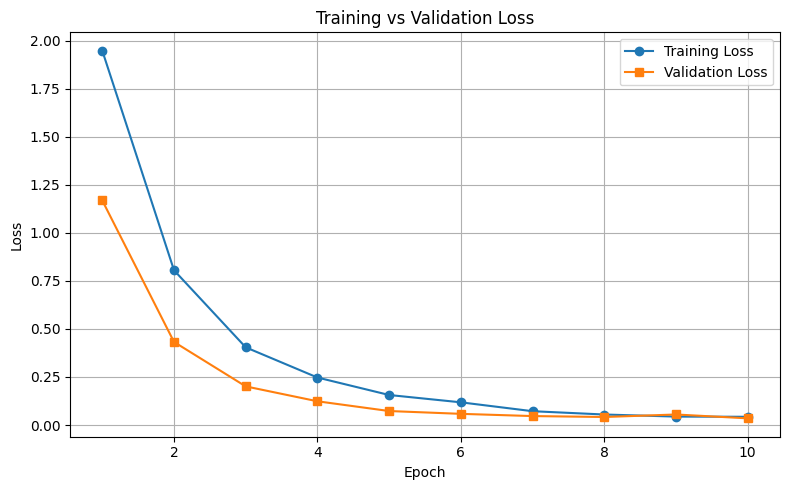

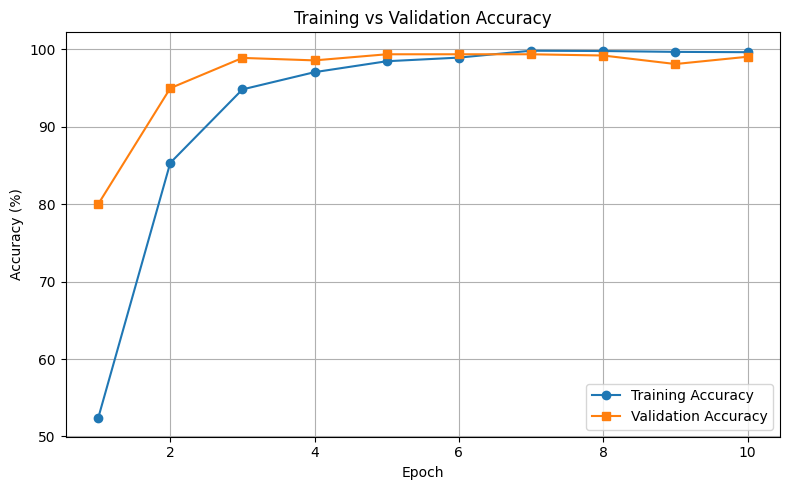

In [27]:
import matplotlib.pyplot as plt

epochs = list(range(1, 11))
train_loss = [1.9469, 0.8049, 0.4041, 0.2471, 0.1562, 0.1181, 0.0719, 0.0547, 0.0439, 0.0429]
train_acc =  [52.34, 85.35, 94.84, 97.07, 98.48, 98.95, 99.84, 99.80, 99.69, 99.65]
val_loss =   [1.1679, 0.4321, 0.2010, 0.1235, 0.0728, 0.0582, 0.0466, 0.0418, 0.0548, 0.0348]
val_acc =    [80.00, 95.00, 98.91, 98.59, 99.38, 99.38, 99.38, 99.22, 98.12, 99.06]


plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("loss_curve.png")  

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_acc, label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("accuracy_curve.png") 